In [1]:
from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt
import numpy as np
import h5py
import timeit

/anaconda3/envs/anacondapy2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
fchlist= open('/Volumes/Mac/ikagra/channel_list/1200000000-32.txt','r')

In [3]:
d1=fchlist.readlines()

In [5]:
d1[3811].split()[0]

'K1:VIS-PR3_TM_OPLEV_LEN_SEG2_INMON'

In [ ]:
K1:GIF-GIF_STRAIN、K1:TES-CAL_PROC_STRAIN_SW、K1:TES-CAL_PROC_ERR_STRAIN_MON 和 K1:TES-CAL_PROC_CTRL_STRAIN_MON

In [5]:
len(d1)

42029

In [15]:
data1 = TimeSeries.read('/Volumes/Mac/ikagra/data/K-K1_C-1200000000-32.gwf','K1:TES-CAL_PROC_CTRL_STRAIN_MON')

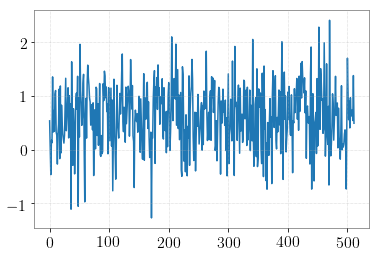

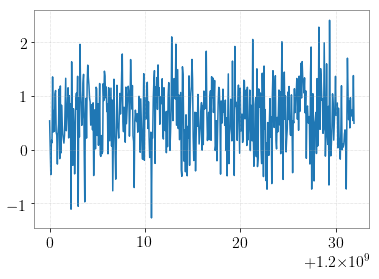

True
0.34004995
(512,)


In [16]:
strain=np.copy(data1)
plt.plot(strain)
plt.show()
plt.plot(data1)
plt.show()
#plt.ylim(34.35,34.45)
print np.var(strain)!=0.
print np.var(strain)
print strain.shape

In [32]:
print(f.read())

K1:PEM-TEMPERATURE_RACK_IMC 16
K1:PEM-HUMIDITY_RACK_IMC 16
K1:PEM-TEMPERATURE_RACK_IOO 16
K1:PEM-HUMIDITY_RACK_IOO 16
K1:PEM-TEMPERATURE_RACK_PRM 16
K1:PEM-HUMIDITY_RACK_PRM 16
K1:PEM-TEMPERATURE_RACK_PR2 16
K1:PEM-HUMIDITY_RACK_PR2 16
K1:PEM-TEMPERATURE_FIELD_DR 16
K1:PEM-HUMIDITY_FIELD_DR 16
K1:PEM-TEMPERATURE_FIELD_OUTDR 16
K1:PEM-HUMIDITY_FIELD_OUTDR 16
K1:PEM-TEMPERATURE_FIELD_CENTER 16
K1:PEM-HUMIDITY_FIELD_CENTER 16
K1:PEM-TEMPERATURE_FIELD_MCRACK 16
K1:PEM-HUMIDITY_FIELD_MCRACK 16
K1:PEM-TEMPERATURE_MOZUMI_SERVER 16
K1:PEM-HUMIDITY_MOZUMI_SERVER 16
K1:PEM-TEMPERATURE_RACK_EY1 16
K1:PEM-HUMIDITY_RACK_EY1 16
K1:PEM-TEMPERATURE_BOOTH_EYC1F 16
K1:PEM-HUMIDITY_BOOTH_EYC1F 16
K1:PEM-TEMPERATURE_BOOTH_EYC2F 16
K1:PEM-HUMIDITY_BOOTH_EYC2F 16
K1:PEM-TEMPERATURE_FIELD_EYA 16
K1:PEM-HUMIDITY_FIELD_EYA 16
K1:PEM-TEMPERATURE_FIELD_CRYDR 16
K1:PEM-HUMIDITY_FIELD_CRYDR 16
K1:PEM-TEMPERATURE_FIELD_CRYDR2 16
K1:PEM-HUMIDITY_FIELD_CRYDR2 16
K1:PEM-TEMPERATURE_FIELD_IXA 16
K1:PEM-HUMIDITY_FIELD_I

In [3]:
i = 1200000000
ch = open('/Volumes/Mac/ikagra/channel_list/1200000000-32.txt','r')
ch_name_list = ch.readlines()
nch = len(ch_name_list)

f = h5py.File('/Volumes/Mac/ikagra/signal','w')

while i <= 1200003616:#把所有時間的data都跑過
    start_time = timeit.default_timer()
    g = f.create_group('{0}'.format(i))#不同時間的data分別存在不同group
    
    chname = g.create_dataset('chname', (10,), maxshape=(None,), dtype = h5py.special_dtype(vlen=str))#存放channel name
    chindex = g.create_dataset('chindex', (10,), maxshape=(None,))#存放channel的在chlist中的位置
    datalen = g.create_dataset('datalen', (10,), maxshape=(None,))#存放該channel 的data長度
    
    k = 1#計算存入的data數目
    for j in range(nch):#把所有channel都跑過
        current_chname = ch_name_list[j].split()[0]
        TS = TimeSeries.read('/Volumes/Mac/ikagra/data/K-K1_C-{0}-32.gwf'.format(i), current_chname)
        strain = np.copy(TS)
        var = np.var(strain)
        if var != 0. :#存入var不為零的data
            l = len(chname)
            if k > l:#檢查存放的空間是否足夠
                chname.resize([l+1,])
                chindex.resize([l+1,])
                datalen.resize([l+1])
            chname[k-1] = current_chname
            chindex[k-1] = j
            datalen[k-1] = len(strain)
            k += 1
            #print k, 'data'
        
    stop_time = timeit.default_timer()
    print i, 'finished.', 'It takes', stop_time - start_time, 'sec. There are', k, 'channel' 
    i += 32
f.close()

/anaconda3/envs/anacondapy2/lib/python2.7/site-packages/numpy/core/_methods.py:116: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


KeyboardInterrupt: 

In [4]:
ff = h5py.File('/Volumes/Mac/ikagra/signal_1200000000.h5','r')

In [5]:
ff.keys()

[u'chindex', u'chname', u'datalen']

In [91]:
print ff['chname'][...]

['K1:PEM-TEMPERATURE_RACK_IMC' 'K1:PEM-HUMIDITY_RACK_IMC'
 'K1:PEM-TEMPERATURE_RACK_IOO' ...
 'K1:TES-CAL_LINE_ETMY2_LKIN_DEMOD_SIG_INMON'
 'K1:TES-CAL_LINE_ETMY2_LKIN_DEMOD_SIG_OUT16'
 'K1:TES-CAL_LINE_ETMY2_LKIN_DEMOD_SIG_OUTPUT']


In [102]:
np.where(ff['chindex'][...]==3737)

(array([738]),)

In [105]:
ff['chname'][...][738]

'K1:VIS-PR3_TM_OPLEV_TILT_SEG2_OUTPUT'

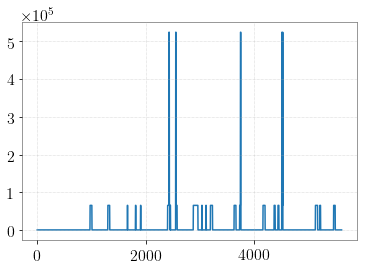

In [10]:
plt.plot(ff['datalen'][...])

52.9000091553 5.82076609135e-11


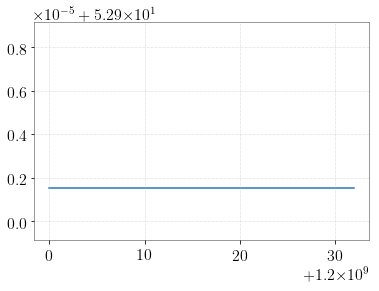

In [44]:
i=10
d=TimeSeries.read('/Volumes/Mac/ikagra/data/K-K1_C-1200000000-32.gwf',ff['chname'][i])
var= np.var(d)
mean= np.mean(d)
plt.plot(d)
plt.ylim(mean-0.00001,mean+0.0000000001)
print mean , var

In [88]:
def plot_signal(n):
    fig = plt.gcf
    plt.figure(figsize=(15,8))
    for i in range(6):
        data = TimeSeries.read('/Volumes/Mac/ikagra/data/K-K1_C-1200000000-32.gwf',ff['chname'][n+i])
        ax = plt.subplot(2,3,i+1)
        ax.plot(data) #畫出subgraph子圖形
        ax.set_title(np.var(data),fontsize=15) #設定子標題大小
        #ax.set_xticks([]) ; ax.set_yticks([]) #設定不顯示刻度
    plt.show()
    

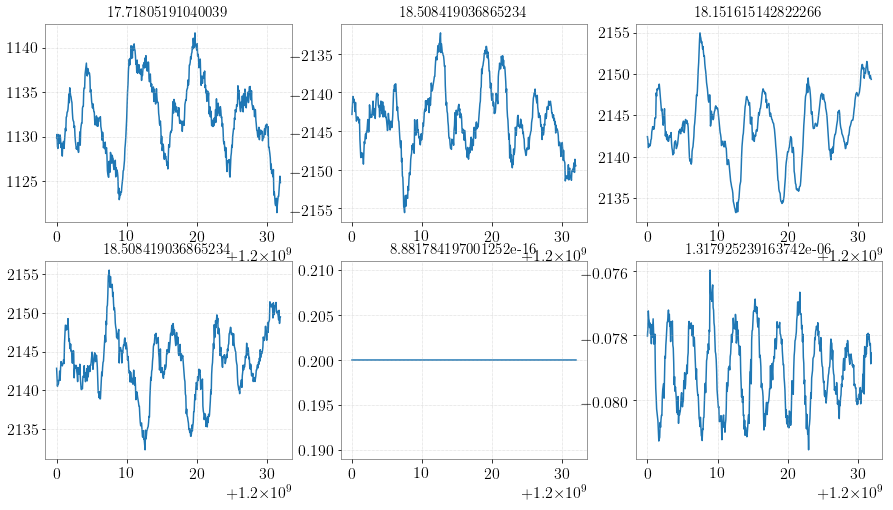

In [100]:
plot_signal(738)

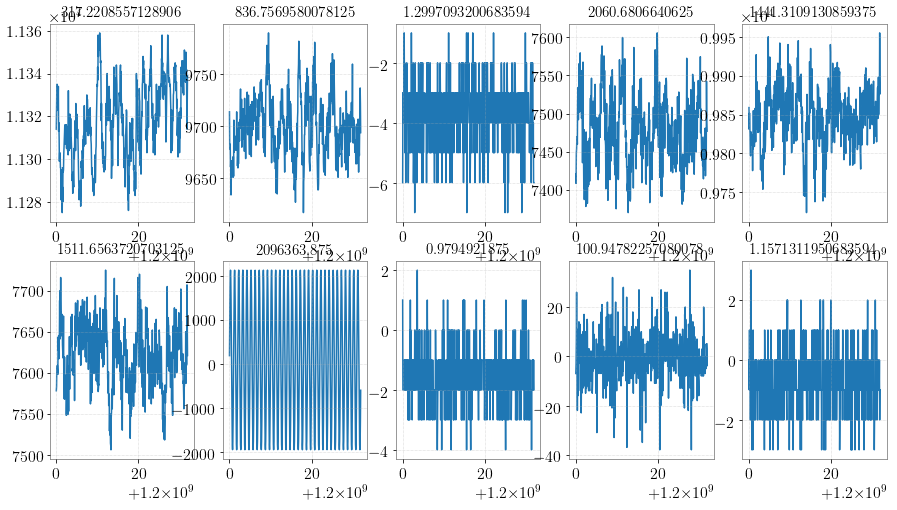

In [84]:
plot_signal(400)

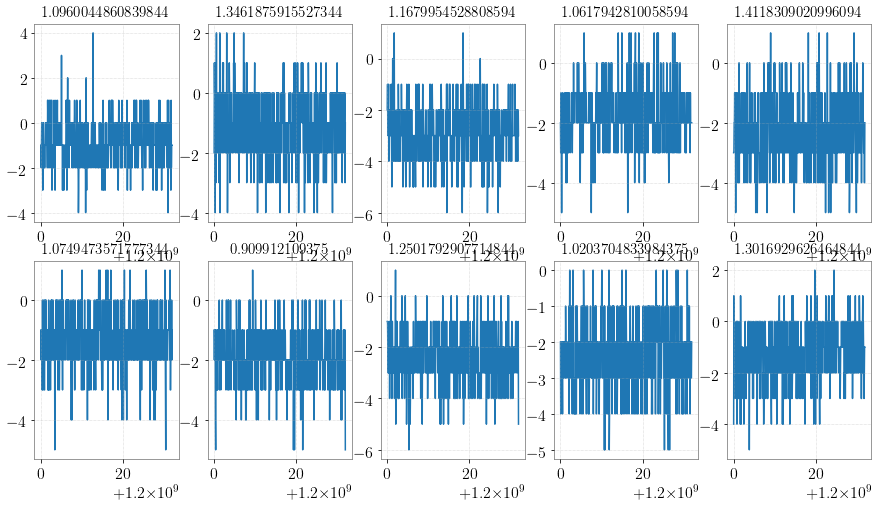

In [85]:
plot_signal(300)

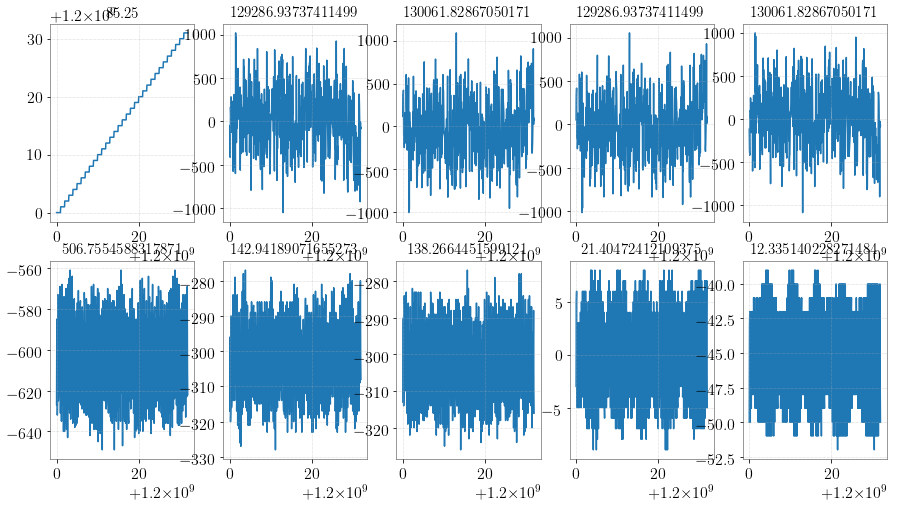

In [86]:
plot_signal(200)

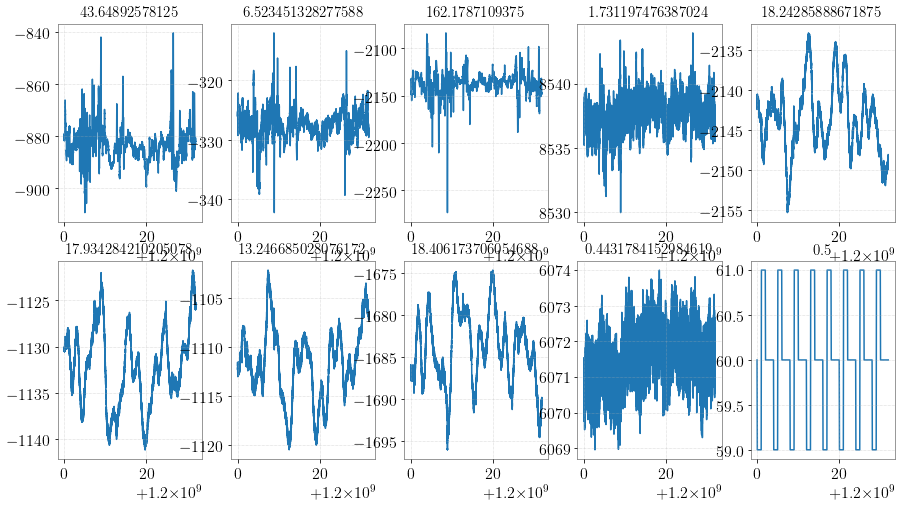

In [87]:
plot_signal(1000)

In [5]:
colist = [3737,3774,3811,3993,4028,4063,4098,4224,4227,4228,4239,4240,4241,4251,4252,4253,4283,
 8765,8801,8813,8825,8837,8951,9069,9196,10624,10636,10672,10684,10696,10708,10822,10940,11067]

In [169]:
[np.where(colist[i]==ff['chindex'][...])[0] for i in range(len(colist))]

[array([738]),
 array([], dtype=int64),
 array([759]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([1512]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([1749]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64)]

738

In [27]:
def plot_channel(n,name):
    arr = np.array([])
    for i in range(28):
        data = TimeSeries.read('/Volumes/Mac/ikagra/data/K-K1_C-{0}-32.gwf'.format(1200000000+(i+n)*32),name)
        s = np.copy(data)
        arr=np.append(arr,s)
        
    plt.figure(figsize=(15,3))
    plt.plot(arr)
    plt.show()

In [38]:
def plotall(idx):
    ind = 0
    for i in range(4):
        plot_channel(ind,d1[idx].split()[0])
        ind += 32*28

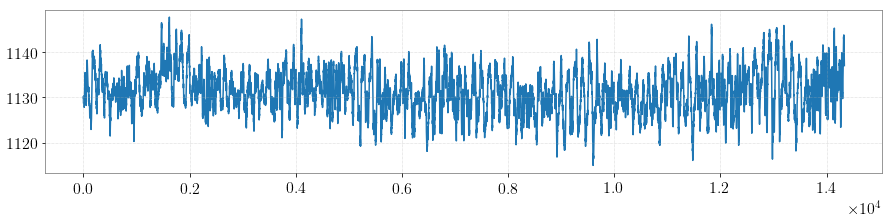

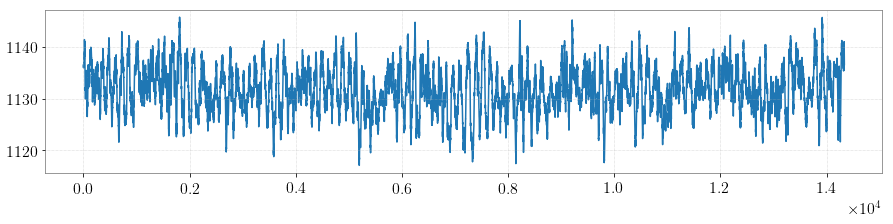

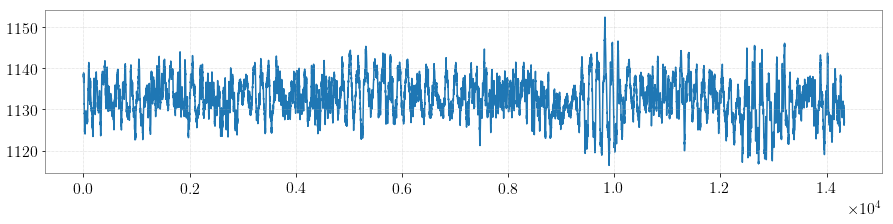

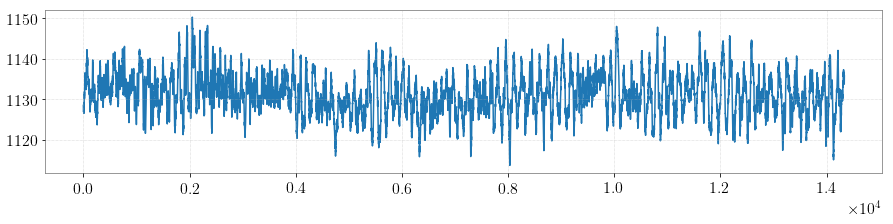

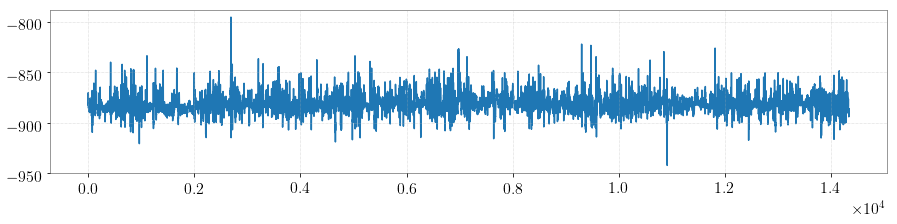

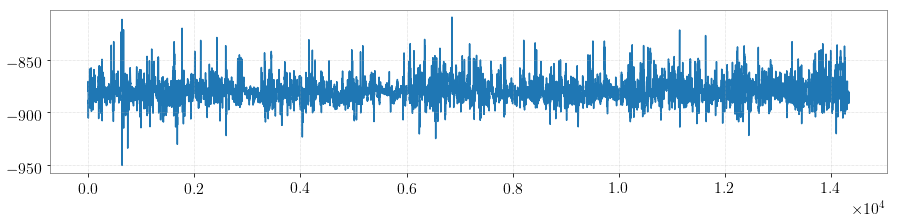

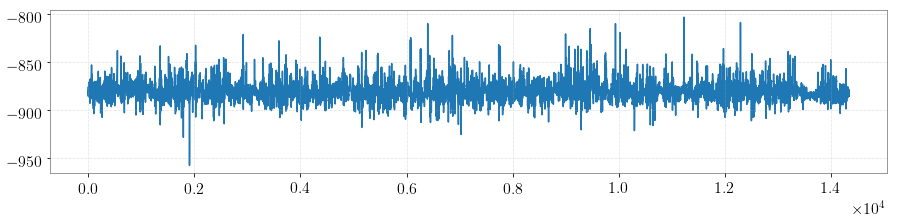

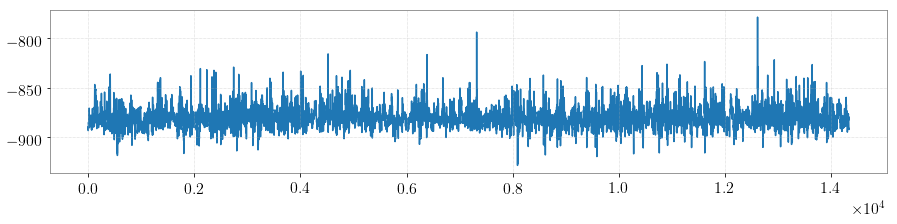

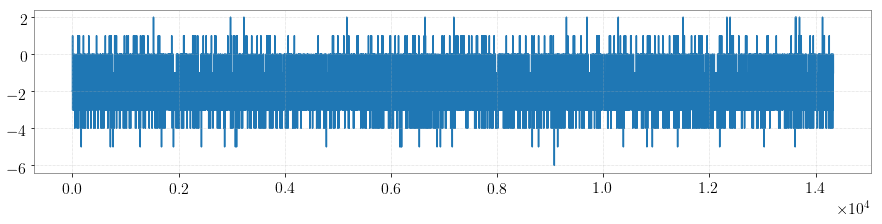

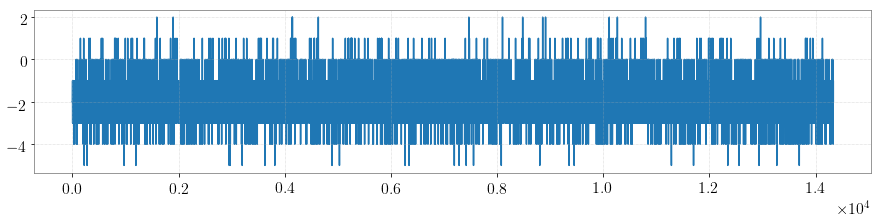

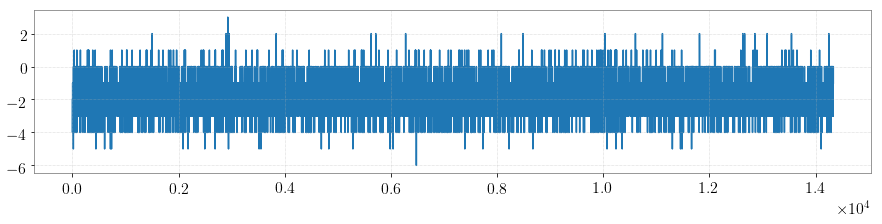

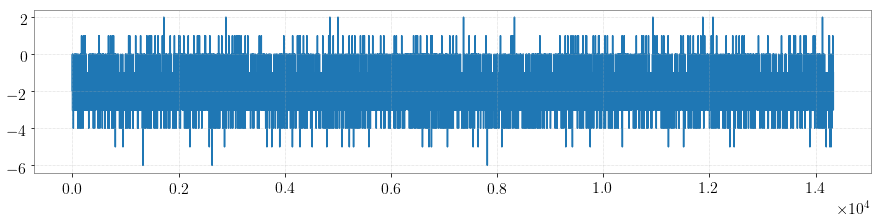

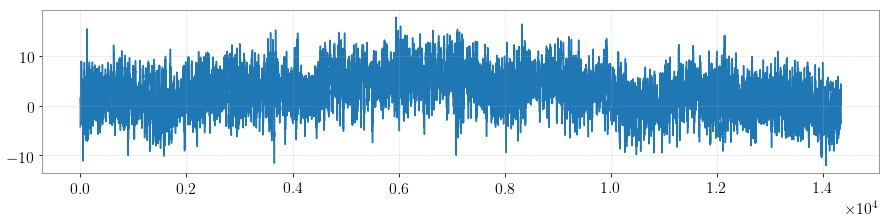

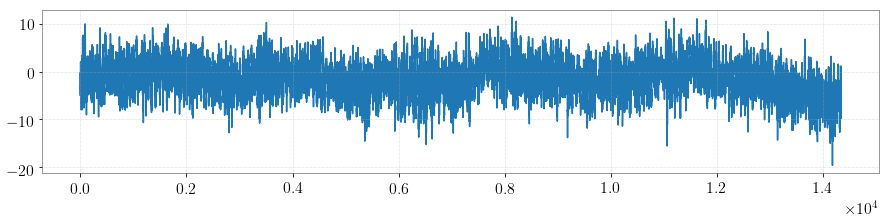

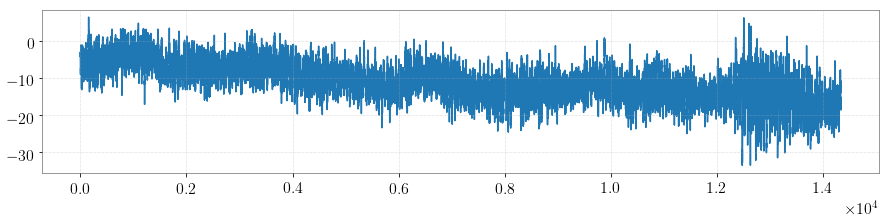

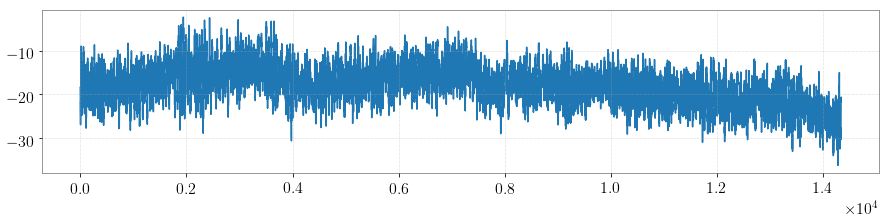

In [40]:
for k in [3737,3811,9069,10708]:
    plotall(k)

In [60]:
def chplot(name):
    arr = np.array([])
    for i in range(113):
        data = TimeSeries.read('/Volumes/Mac/ikagra/data/K-K1_C-{0}-32.gwf'.format(1200000000+i*32), d1[name].split()[0])
        s = np.copy(data)
        arr = np.append(arr,s)
    var = np.var(arr)
    print name, d1[name].split()[0], var
    if var != 0:
        plt.figure(figsize=(20,4))
        plt.plot(arr)
        #plt.title('{0}'.format(d1[name].split()[0])) #latex無法處理channel的name
        plt.show()
        #return arr

In [20]:
for k,i in enumerate(colist):
    data = TimeSeries.read('/Volumes/Mac/ikagra/data/K-K1_C-{0}-32.gwf'.format(1200000000+3616), d1[i].split()[0])
    print k,np.copy(data).shape

0 (512,)
1 (512,)
2 (512,)
3 (512,)
4 (512,)
5 (512,)
6 (512,)
7 (512,)
8 (512,)
9 (512,)
10 (512,)
11 (512,)
12 (512,)
13 (512,)
14 (512,)
15 (512,)
16 (512,)
17 (65536,)
18 (512,)
19 (512,)
20 (512,)
21 (512,)
22 (512,)
23 (512,)
24 (512,)
25 (512,)
26 (512,)
27 (512,)
28 (512,)
29 (512,)
30 (512,)
31 (512,)
32 (512,)
33 (512,)


In [63]:
len(colist)

34

3737 K1:VIS-PR3_TM_OPLEV_TILT_SEG2_OUTPUT 23.43762588144375


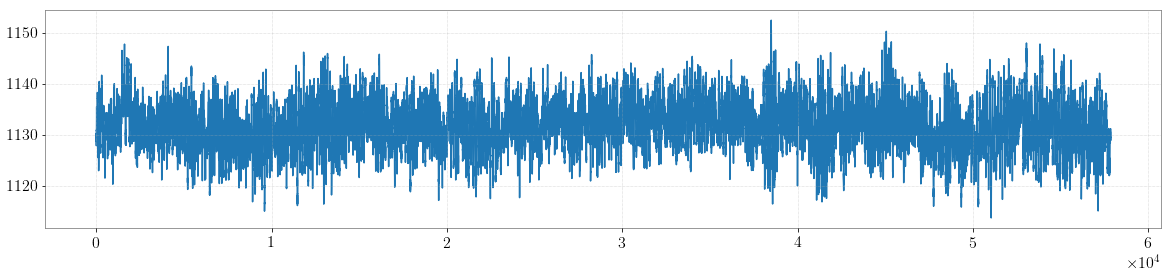

3774 K1:VIS-PR3_TM_OPLEV_LEN_SUM_LIMIT 0.0
3811 K1:VIS-PR3_TM_OPLEV_LEN_SEG2_INMON 83.51068417144631


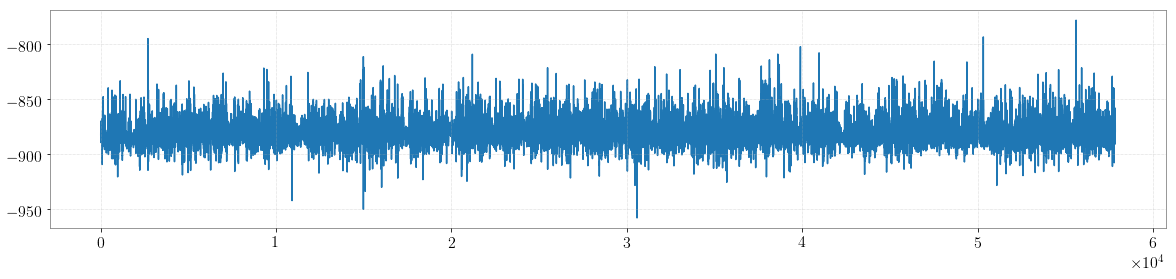

3993 K1:VIS-PR3_SF_TEST_GAS_GAIN 0.0
4028 K1:VIS-PR3_IM_COILOUTF_H2_TRAMP 0.0
4063 K1:VIS-PR3_IM_COILOUTF_V2_SWMASK 0.0
4098 K1:VIS-PR3_IM_DAMP_P_EXCMON 0.0
4224 K1:VIS-PR3_IM_DRIVEALIGN_L2Y_GAIN 0.0
4227 K1:VIS-PR3_IM_DRIVEALIGN_L2Y_SWREQ 0.0
4228 K1:VIS-PR3_IM_DRIVEALIGN_L2Y_SWMASK 0.0
4239 K1:VIS-PR3_IM_DRIVEALIGN_P2L_SWMASK 0.0
4240 K1:VIS-PR3_IM_DRIVEALIGN_P2L_INMON 0.0
4241 K1:VIS-PR3_IM_DRIVEALIGN_P2L_EXCMON 0.0
4251 K1:VIS-PR3_IM_DRIVEALIGN_P2P_INMON 0.0
4252 K1:VIS-PR3_IM_DRIVEALIGN_P2P_EXCMON 0.0
4253 K1:VIS-PR3_IM_DRIVEALIGN_P2P_OUT16 0.0
4283 K1:VIS-PR3_IM_DRIVEALIGN_Y2P_SWMASK 0.0
8765 K1:PEM-MCF_SEIS_Y_SENSINF_OUT_DQ 0.0
8801 K1:FEC-33_ADC_OVERFLOW_0_24 0.0
8813 K1:FEC-33_ADC_OVERFLOW_1_4 0.0
8825 K1:FEC-33_ADC_OVERFLOW_1_16 0.0
8837 K1:FEC-33_ADC_OVERFLOW_1_28 0.0
8951 K1:FEC-33_DAC_OVERFLOW_ACC_0_12 0.0
9069 K1:IOP-IMC0_MADC1_EPICS_CH18 1.0176489255900518


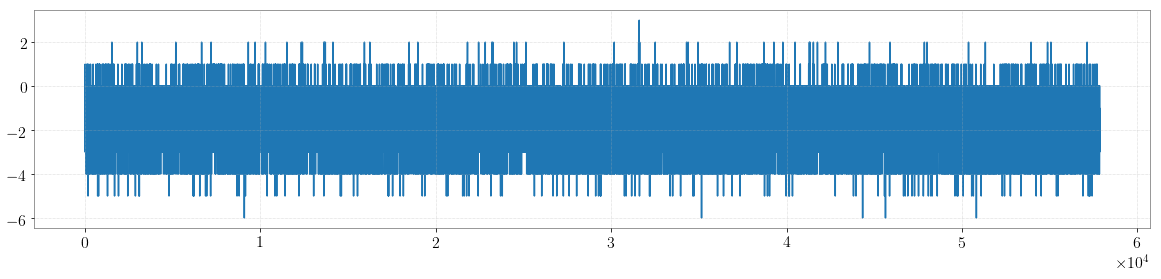

9196 K1:FEC-34_ADC_OVERFLOW_ACC_0_20 0.0
10624 K1:VIS-MCE_TM_DRIVEALIGN_L2P_SWSTAT 0.0
10636 K1:VIS-MCE_TM_DRIVEALIGN_P2L_OFFSET 0.0
10672 K1:VIS-MCE_TM_DRIVEALIGN_Y2L_TRAMP 0.0
10684 K1:VIS-MCE_TM_DRIVEALIGN_Y2P_SWREQ 0.0
10696 K1:VIS-MCE_TM_DRIVEALIGN_Y2Y_SWMASK 0.0
10708 K1:VIS-MCE_TM_ISCINF_L_INMON 87.92532886416382


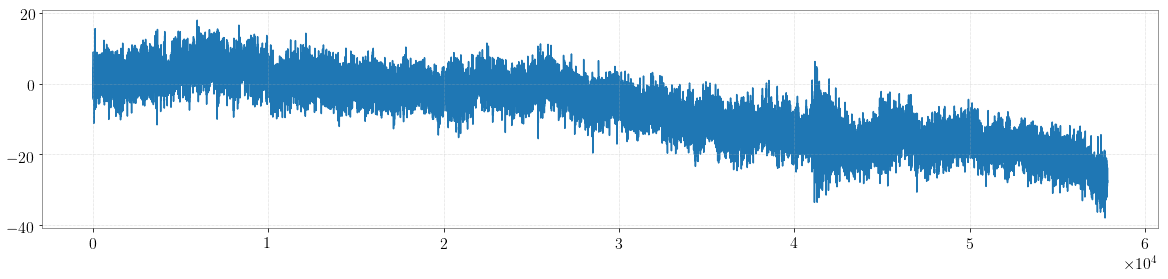

10822 K1:VIS-MCE_TM_LOCK_P_SWSTAT 0.0
10940 K1:VIS-MCE_TM_OPTICALIGN_P_EXCMON 0.0
11067 K1:FEC-36_TIME_ERR 0.0


In [61]:
for i in colist:
    chplot(i)

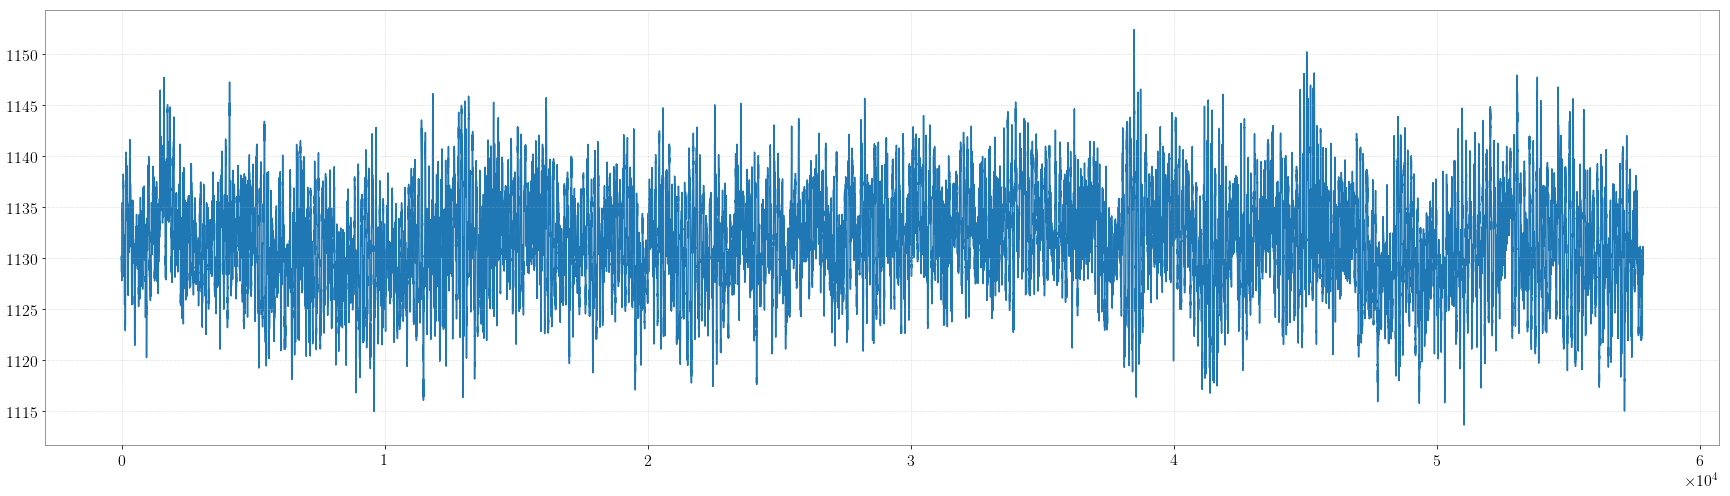

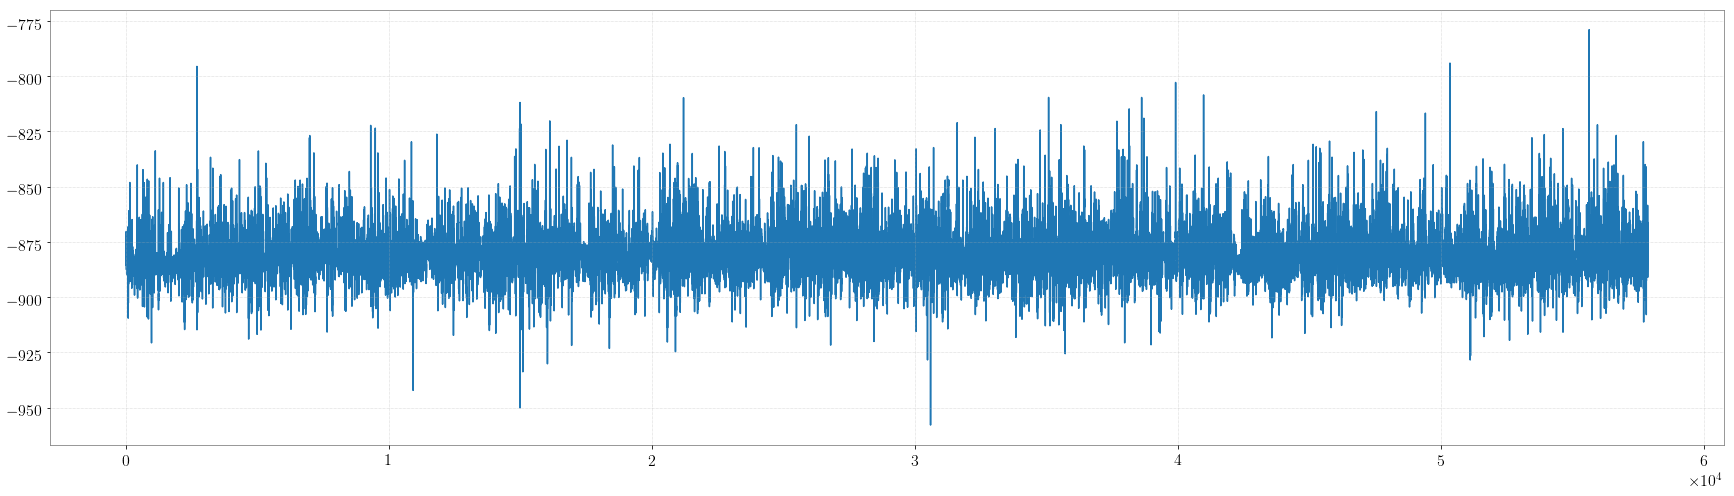

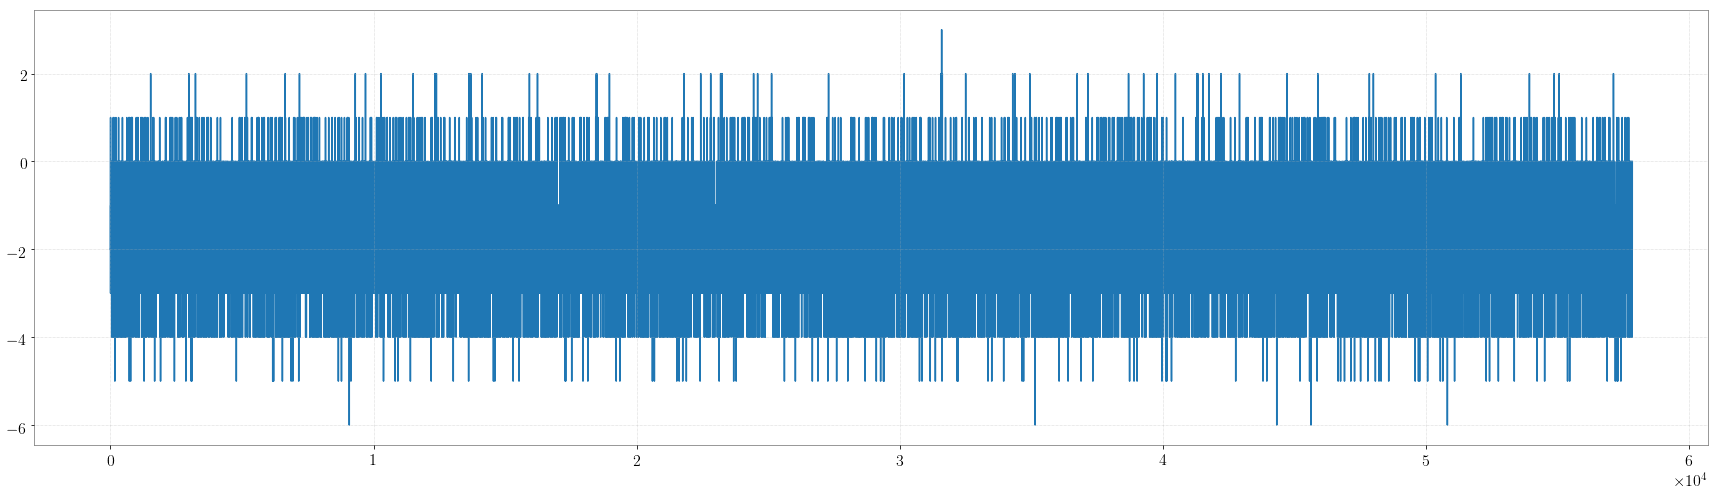

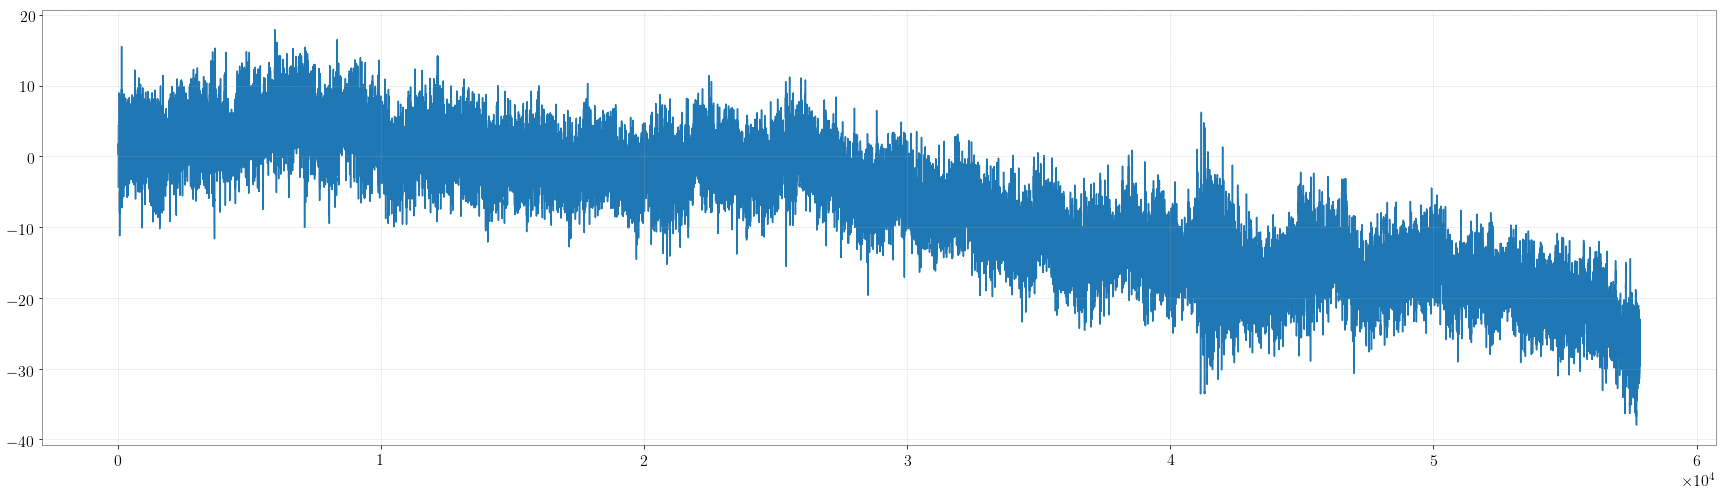

In [20]:
x1 = chplot(3737)
x2 = chplot(3811)
x3 = chplot(9069)
x4 = chplot(10708)

In [41]:
from sklearn.decomposition import FastICA
from scipy.signal import spectrogram

In [34]:
X = np.c_[x1, x2, x3, x4]
X /= X.std(axis=0)

In [35]:
X.shape

(57856, 4)

In [36]:
ica = FastICA(n_components=4)
S_ = ica.fit_transform(X)
A_ = ica.mixing_

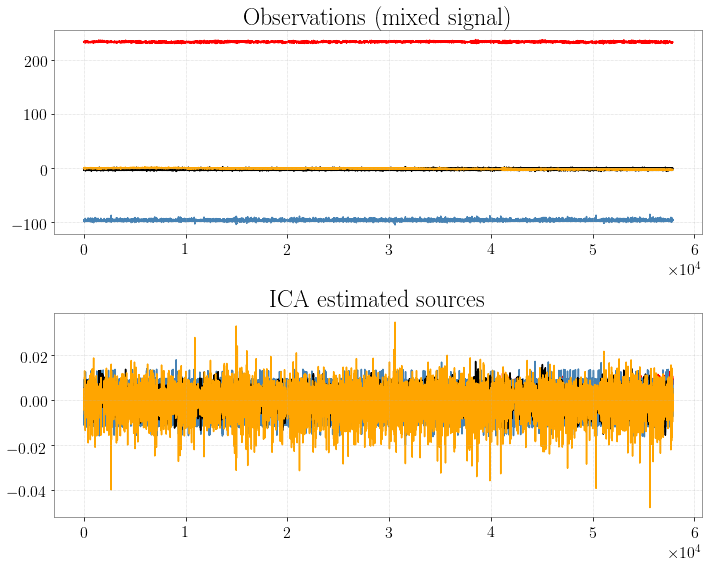

In [37]:
models = [X, S_]
names = ['Observations (mixed signal)',
         'ICA estimated sources']
colors = ['red', 'steelblue', 'black', 'orange']

plt.figure(figsize=(10,8))
for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(2, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

(57856,)


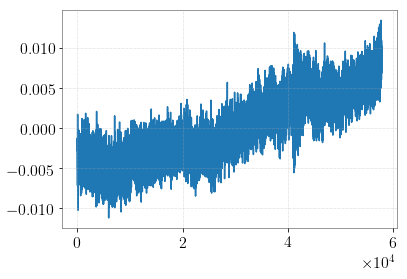

(57856,)


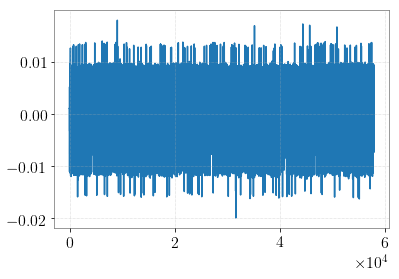

(57856,)


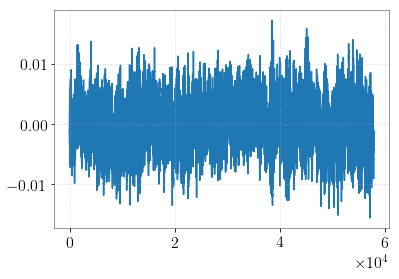

(57856,)


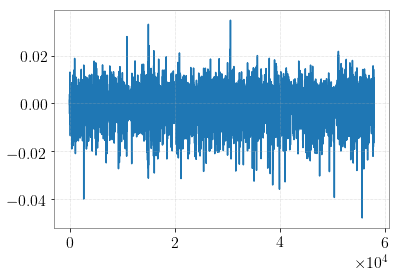

In [39]:
for i in range(4):
    
    plt.plot(S_.T[i])
    print S_.T[i].shape
    plt.show()

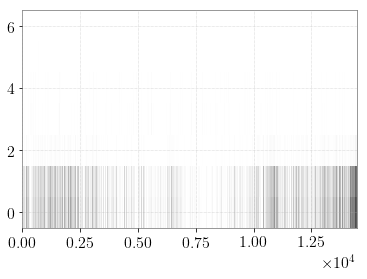

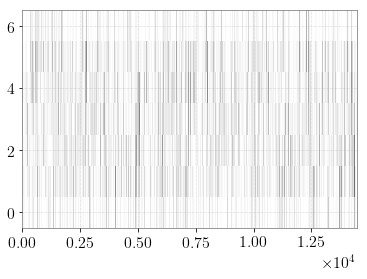

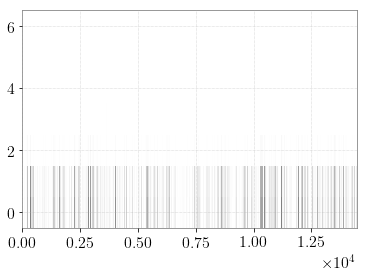

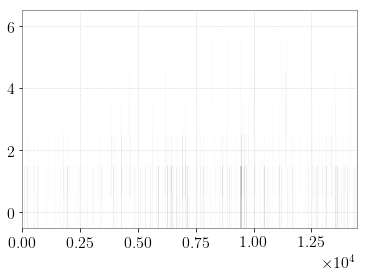

In [44]:
for i in range(4):
    freqs, bins, spec_data = spectrogram(S_.T[i], nfft=12, fs=16, window = np.blackman(12), noverlap=8, detrend=False)
    plt.imshow(spec_data ,cmap='binary')
    plt.show()